Kali ini kita akan mempelajari dasar dari Machine Learning Supervised. Supervised adalah cara kita melatih algoritma, dengan memberikan contoh-contoh data, dengan memberitahukan hasil yang ingin kita capai.

Ingin tahu bagaimana kita mengolah menggunakan Machine Learning kan? Silahkan kita mulai baca saja dibawah ini.

# STEP 1


Import library yang dibutuhkan:
- Pandas: library yang sering digunakan untuk membantu analisis data/ struktur data.
- Numpy: library untuk memudahkan perhitungan tipe data numerik di python.
- matplotlib.pyplot: library yang digunakan untuk melakukan visualisasi data.
- Scikit-Learn : library yang sering digunakan utk membantu, mempersiapkan, mengolah, hingga melakukan berbagai macam machine learning terhadap sebuah data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Untuk data yang akan digunakan, akan kita clone data yang sudah disediakan sama saya

In [ ]:
!git clone https://github.com/Hakimaruuu/kNearestNeighbors.git

Cloning into 'kNearestNeighbors'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


# STEP 2

Kita otomatis perlu membaca dan menyimpan data tersebut. Kita pakai:
- pd.read_csv('nama_file.csv')

yang berguna untuk membaca sebuah file berformat csv, dan disimpan pada variabel df_raw.

Untuk berjaga-jaga, alangkah baiknya melakukan pengisian record baris yang kosong dengan menggunakan fungsi:
- fillna, dengan metode= 'ffill'

Metode ffill ini mengisikan baris yang None dengan nilai record sebelumnya. Defaultnya sih dengan baris atasnya.

Pada Machine Learning, umum kita mendengar adanya kata Data training dan Data test. Maksudnya:
- Data training : data yang digunakan untuk melatih algoritma machine learning. Entah mendapatkan sebuah pola, korelasi, atau perbedaan yang pada data.
- Data test : data yang akan digunakan untuk menguji kemampuan/ ketepatan algoritma

Pada keduanya, diterapkan ffill pada data training dan uji

In [ ]:
df_raw = pd.read_csv('kNearestNeighbors/kendaraan_train.csv')
df_raw = df_raw.fillna(method='ffill')
df_raw_test = pd.read_csv('kNearestNeighbors/kendaraan_test.csv')
df_raw_test = df_raw_test.fillna(method='ffill')

Untuk melihat 5 baris data training

In [ ]:
df_raw.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0,0


Untuk melihat 5 baris utama data test

In [ ]:
df_raw_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


# STEP 3 PREPROCESSING

DROP FITUR TIDAK DIGUNAKAN

Dari kedua data, kita perlu menentukan fitur yang akan dipakai dalam pelatihan dan pengujian algoritma. Biasanya data bertipe data numerik, atau boleh mencoba-coba sendiri fitur yang akan digunakan.

Untuk kali ini, kita akan melakukan drop pada fitur berikut:

In [ ]:
df_drop_few = df_raw.drop(['id','Jenis_Kelamin','SIM','Kode_Daerah'], axis=1)
df_drop_few_test = df_raw_test.drop(['Jenis_Kelamin','SIM','Kode_Daerah'], axis=1)

Dan kedua file dilihat dengan menggunakan fungsi head()

In [ ]:
df_drop_few.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,48.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,21.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,58.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,50.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0,0


In [ ]:
df_drop_few_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,0,1-2 Tahun,Pernah,46963,26,145,0
1,22,1,< 1 Tahun,Tidak,39624,152,241,0
2,24,1,< 1 Tahun,Tidak,110479,152,62,0
3,46,1,1-2 Tahun,Tidak,36266,124,34,0
4,35,0,1-2 Tahun,Pernah,26963,152,229,0


# STEP 3.5 BINERISASI (OPSIONAL)

Binerisasi bertujuan untuk mengubah data yang nilainya memiliki pola yang kita sudah ketahui, dan diubah secara MANUAL menjadi tipe data numerik.

Pada fitur Umur_Kendaraan, value pada akan kita ubah menjadi numerik:
- '< 1 Tahun' = 0.0
- '1-2 Tahun' = 1.0
- '> 2 Tahun' = 2.0


In [ ]:
df_drop_few['Umur_Kendaraan'] = df_drop_few['Umur_Kendaraan'].replace(to_replace='< 1 Tahun', value=0.0)
df_drop_few['Umur_Kendaraan'] = df_drop_few['Umur_Kendaraan'].replace(to_replace='1-2 Tahun', value=1.0)
df_drop_few['Umur_Kendaraan'] = df_drop_few['Umur_Kendaraan'].replace(to_replace='> 2 Tahun', value=2.0)

In [ ]:
df_drop_few_test['Umur_Kendaraan'] = df_drop_few_test['Umur_Kendaraan'].replace(to_replace='< 1 Tahun', value=0.0)
df_drop_few_test['Umur_Kendaraan'] = df_drop_few_test['Umur_Kendaraan'].replace(to_replace='1-2 Tahun', value=1.0)
df_drop_few_test['Umur_Kendaraan'] = df_drop_few_test['Umur_Kendaraan'].replace(to_replace='> 2 Tahun', value=2.0)

Pada fitur Kendaraan_Rusak, akan dilakukan hal berikut:
- Tidak = 0.0
- Pernah = 1.0

In [ ]:
df_drop_few['Kendaraan_Rusak'] = df_drop_few['Kendaraan_Rusak'].replace(to_replace='Tidak', value=0.0)
df_drop_few['Kendaraan_Rusak'] = df_drop_few['Kendaraan_Rusak'].replace(to_replace='Pernah', value=1.0)
df_drop_few.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,48.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,21.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,58.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,50.0,0.0,2.0,0.0,34857.0,88.0,194.0,0


In [ ]:
df_drop_few_test['Kendaraan_Rusak'] = df_drop_few_test['Kendaraan_Rusak'].replace(to_replace='Tidak', value=0.0)
df_drop_few_test['Kendaraan_Rusak'] = df_drop_few_test['Kendaraan_Rusak'].replace(to_replace='Pernah', value=1.0)
df_drop_few_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,0,1.0,1.0,46963,26,145,0
1,22,1,0.0,0.0,39624,152,241,0
2,24,1,0.0,0.0,110479,152,62,0
3,46,1,1.0,0.0,36266,124,34,0
4,35,0,1.0,1.0,26963,152,229,0


# STEP 4 NORMALISASI

Normalisasi dilakukan untuk mengubah nilai-nilai pada fitur menjadi nilai yang berada pada rentang 0 sampai 1.

 Kali ini menggunakan model Min-Max Normalization.

In [ ]:
def minmax_norm(x):
    return (x - x.min()) / (x.max() - x.min())

Normalisasi diterapkan pada fitur berikut:

In [ ]:
df_norm = df_drop_few
df_norm['Umur'] = minmax_norm(df_drop_few['Umur'])
df_norm['Premi'] = minmax_norm(df_drop_few['Premi'])
df_norm['Kanal_Penjualan'] = minmax_norm(df_drop_few['Kanal_Penjualan'])
df_norm['Lama_Berlangganan'] = minmax_norm(df_drop_few['Lama_Berlangganan'])
df_norm.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.153846,1.0,0.0,0.0,0.047251,0.932099,0.301038,0
1,0.430769,0.0,2.0,1.0,0.043104,0.172840,0.512111,0
2,0.015385,1.0,0.0,0.0,0.056002,0.981481,0.377163,0
3,0.584615,0.0,1.0,0.0,0.000000,0.759259,0.183391,0
4,0.461538,0.0,2.0,0.0,0.059953,0.537037,0.636678,0


In [ ]:
df_norm_test = df_drop_few_test
df_norm_test['Umur'] = minmax_norm(df_drop_few_test['Umur'])
df_norm_test['Premi'] = minmax_norm(df_drop_few_test['Premi'])
df_norm_test['Kanal_Penjualan'] = minmax_norm(df_drop_few_test['Kanal_Penjualan'])
df_norm_test['Lama_Berlangganan'] = minmax_norm(df_drop_few_test['Lama_Berlangganan'])
df_norm_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.446154,0,1.0,1.0,0.082475,0.154321,0.467128,0
1,0.030769,1,0.0,0.0,0.068822,0.932099,0.799308,0
2,0.061538,1,0.0,0.0,0.200636,0.932099,0.179931,0
3,0.400000,1,1.0,0.0,0.062575,0.759259,0.083045,0
4,0.230769,0,1.0,1.0,0.045268,0.932099,0.757785,0


# STEP 5 LABELLING

Pada Machine Learning - Supervised Learning, diperlukan label dari tiap-tiap data sebagai indikator latih untuk mencari pola dari fitur yang digunakan.

Pada data test, fitur yang akan dicari polanya ditampung pada variabel data, dan indikator ditampung pada variabel label.

Begitu pula pada data test pada variabel data_test, dan label_test.

In [ ]:
data = df_norm[['Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Lama_Berlangganan']]
label = df_norm['Tertarik']
data_test = df_norm_test[['Umur','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Lama_Berlangganan']]
label_test = df_norm_test['Tertarik']

Untuk mempersingkat waktu training dan testing, kita akan mengambil hanya 40.000 data training dan 10.000 data latih

In [ ]:
x_train = data[:40000]
x_test = data_test[:10000]
y_train = label[:40000]
y_test = label_test[:10000]

# STEP 6 ML APPLICATION

Pada step ini, kita menggunakan Machine Learning supervised yaitu  K-Nearest Neighbors. 

Konsep algoritma ini adalah: "Kalau ingin tau info rumah ini punya siapa, penghuninya siapa, kerjanya apa, suka ngapain aja, kenapa ngga nanya tetangganya aja."

Analoginya bisa dibaca di: https://informatikalogi.com/algoritma-k-nn-k-nearest-neighbor/

TRAINING

Pertama kita perlu import KNN dari Scikit Learn (sklearn). 

Kemudian, KNeighborsClassifier kita deklarasikan pada variabel classifier.

Kita menggunakan nilai n_neighbors = 10 (banyak tetangga sebanyak 10)

Dilanjutkan dengan melatih algoritma dengan fungsi: 
- classifier.fit('fitur_data_training', 'label_data_training')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

PREDICTION

Setelah dilatih, kita suruh prediksi data testing yang dipersiapkan dengan menggunakan:
- classifier.predict('fitur_data_test')

dan disimpan pada variabel y_pred

In [ ]:
y_pred = classifier.predict(x_test)

EVALUATE

Untuk mengetahui hasil rapot algoritma, kita gunakan classification report dari SKLearn

Classification report berguna untuk melihat kecocokan label hasil prediksi (y_pred) dengan label data test sebenarnya, dan dirata-rata akurasinya.

Oleh karena itu, kita print classification_report dengan menggunakan label data test (y_test) dengan hasil prediksi (y_pred)

In [ ]:
from sklearn.metrics import classification_report
print('classification_report',classification_report(y_test,y_pred))

confusion_matrix:  [[8643  161]
 [1120   76]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.98      0.93      8804
           1       0.32      0.06      0.11      1196

    accuracy                           0.87     10000
   macro avg       0.60      0.52      0.52     10000
weighted avg       0.82      0.87      0.83     10000



Didapatkan hasil 'f1-score' (yang paling dilihat sebagai penentu hasil performa) sebesar 0.87 atau 87 persen.

RATE ERROR

Pada KNN, pastinya kita perlu menentukan nilai n_neighbors (atau disebut nilai K) terbaik untuk mendapatkan nilai f1 terbaik. Dan nilai K tersebut bakal bervariasi.

Oleh karena itu kita dapat menggunakan metode Rate Error untuk menentukan nilai K berdasarkan rerata error.

Untuk pengujian kita menentukan nilai K dari 1 sampai 21 dengan step loncat 1. Perlu diingat juga KNN optimal pada nilai K ganjil.

In [ ]:
error = []
for i in range(1,21,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Kemdian, kita visualisasikan nilai rate errornya

Text(0, 0.5, 'Mean Error')

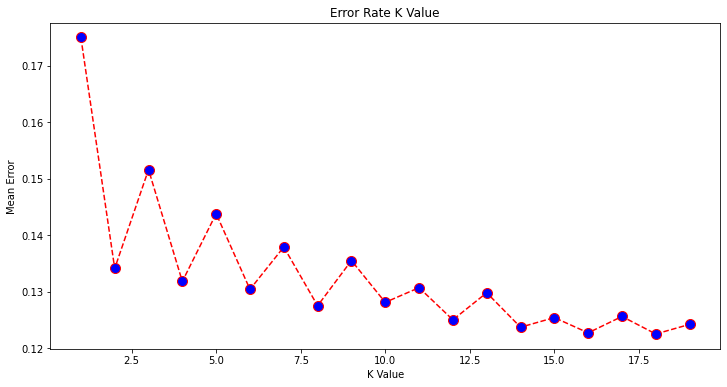

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', 
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Mean Error')

Dari grafik diatas, nilai paling kecil dari 1 sampai 20 adalah 18.

Kemudian kita aplikasikan dengan set n_neighbors = 18.

In [ ]:
# Dari grafik diatas nilai K teroptimal adalah 18.
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train, y_train)
pred_i = knn.predict(x_test)
print('classification_report',classification_report(y_test,pred_i))

classification_report               precision    recall  f1-score   support

           0       0.88      0.99      0.93      8804
           1       0.40      0.05      0.09      1196

    accuracy                           0.88     10000
   macro avg       0.64      0.52      0.51     10000
weighted avg       0.83      0.88      0.83     10000



Dari penentuan nilai K = 18, didapatkan nilai f1-score menjadi 0.88 atau 88 persen

# BONUS 

Berikut adalah contoh metode machine learning supervised lain. 

Tidak sekompleks KNN, dan self-explanatory.

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)
Y_predict = nbtrain.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.7151


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      8804
           1       0.28      0.85      0.42      1196

    accuracy                           0.72     10000
   macro avg       0.62      0.78      0.61     10000
weighted avg       0.89      0.72      0.76     10000



RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rf.fit(x_train,y_train)
rf_y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      8804
           1       0.35      0.14      0.20      1196

    accuracy                           0.87     10000
   macro avg       0.62      0.55      0.56     10000
weighted avg       0.83      0.87      0.84     10000



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_test_pred = tree_model.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8804
           1       0.30      0.33      0.32      1196

    accuracy                           0.83     10000
   macro avg       0.60      0.61      0.61     10000
weighted avg       0.84      0.83      0.83     10000

